In [169]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [78]:
df=pd.read_csv('C:\\Users\\suyas\\OneDrive\\Desktop\\titanic dataset\\train.csv')

In [79]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
df.shape

(891, 12)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [84]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [85]:
df['Embarked'].fillna('S',inplace=True)

In [86]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

C:\Users\suyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

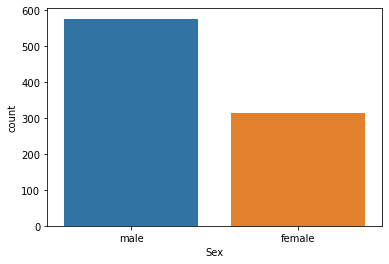

In [87]:
#univariant analysis
sns.countplot(df['Sex'])


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

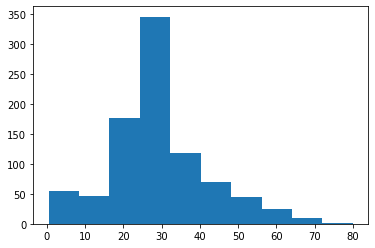

In [88]:
plt.hist(df['Age'])

C:\Users\suyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

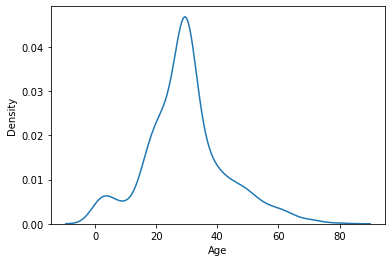

In [89]:
sns.distplot(df['Age'],hist=False)

In [90]:
df.skew()

C:\Users\suyas\AppData\Local\Temp\ipykernel_23796\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

C:\Users\suyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

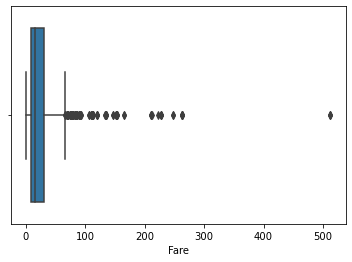

In [91]:
sns.boxplot(df['Fare'])

C:\Users\suyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

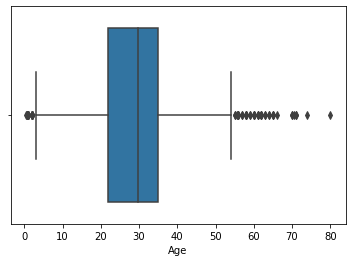

In [92]:
sns.boxplot(df['Age'])

In [93]:
#bivariant analysis

C:\Users\suyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\suyas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

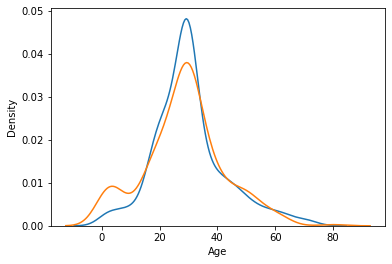

In [94]:
sns.distplot(df[df['Survived']==0]['Age'],hist=False)
sns.distplot(df[df['Survived']==1]['Age'],hist=False)

In [95]:
#here intresting thing we can notice is that 
# People with less age had more probability of surving than middle age people 
# We can relate this to real life also.


In [96]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [97]:
#  people with more money survived more than people with less money

In [98]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [99]:
#Male died more than female that's why Leonardo DiCaprio
#   died in the movie and his girfriend survive.

In [100]:
pd.crosstab(df['SibSp'],df['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [101]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [102]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [103]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

In [104]:
#we have catagorical columns like parch, sex etc... so,we converted these class into vecterozied form.
def one_hot_encode(df,column):
    one_hot=pd.get_dummies(df[column]).add_prefix(f'{column}_')
    df=df.drop(column ,axis=1)
    df=df.join(one_hot)
    return df

In [122]:
df2=df.copy()
columns=['Pclass','Sex','SibSp','Parch','Embarked']
for col in columns:
    df2=one_hot_encode(df2, col)
df2.head()


,PassengerId,Survived,Name,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,NaN,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,C85,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,NaN,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,C123,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,373450,8.0500,NaN,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [123]:
df2.shape

(891, 29)

In [140]:
df3=df2.drop(['Name','Cabin','Ticket'],axis=1)

In [141]:
df3.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [142]:
df3

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.000000,7.2500,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1,38.000000,71.2833,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,26.000000,7.9250,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1,35.000000,53.1000,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,35.000000,8.0500,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,13.0000,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
887,888,1,19.000000,30.0000,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
888,889,0,29.699118,23.4500,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
889,890,1,26.000000,30.0000,1,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0


In [143]:

X=df3.drop(['Survived'],axis=1)
y=df3['Survived']

In [144]:
X

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,2,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,3,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,4,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,5,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,888,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,889,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,890,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [145]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [164]:
clf=DecisionTreeClassifier()

In [165]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3479987604384134, 0.9722222222222222, 'X[7] <= 0.5\ngini = 0.468\nsamples = 668\nvalue = [419, 249]'),
 Text(0.13883089770354906, 0.9166666666666666, 'X[5] <= 0.5\ngini = 0.36\nsamples = 221\nvalue = [52, 169]'),
 Text(0.06263048016701461, 0.8611111111111112, 'X[2] <= 22.0\ngini = 0.062\nsamples = 124\nvalue = [4, 120]'),
 Text(0.04175365344467641, 0.8055555555555556, 'X[1] <= 56.0\ngini = 0.18\nsamples = 30\nvalue = [3, 27]'),
 Text(0.033402922755741124, 0.75, 'X[0] <= 49.5\ngini = 0.128\nsamples = 29\nvalue = [2, 27]'),
 Text(0.016701461377870562, 0.6944444444444444, 'X[1] <= 41.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.008350730688935281, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.025052192066805846, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05010438413361169, 0.6944444444444444, 'X[1] <= 37.0\ngini = 0.071\nsamples = 27\nvalue = [1, 26]'),
 Text(0.04175365344467641, 0.6388888888888888, 'gini = 0.0\nsampl

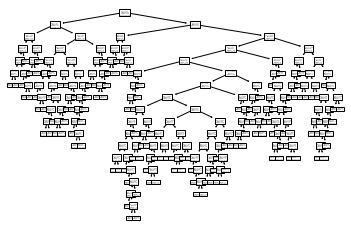

In [166]:
from sklearn.tree import plot_tree
plot_tree(clf)

In [150]:
clf.feature_importances_

array([0.21984991, 0.1331042 , 0.15071952, 0.02629874, 0.        ,
       0.07394186, 0.29523072, 0.        , 0.00846652, 0.01739468,
       0.        , 0.01156708, 0.00949094, 0.00444888, 0.        ,
       0.00316365, 0.00978876, 0.01631264, 0.        , 0.        ,
       0.        , 0.        , 0.00856967, 0.00927949, 0.00237274])

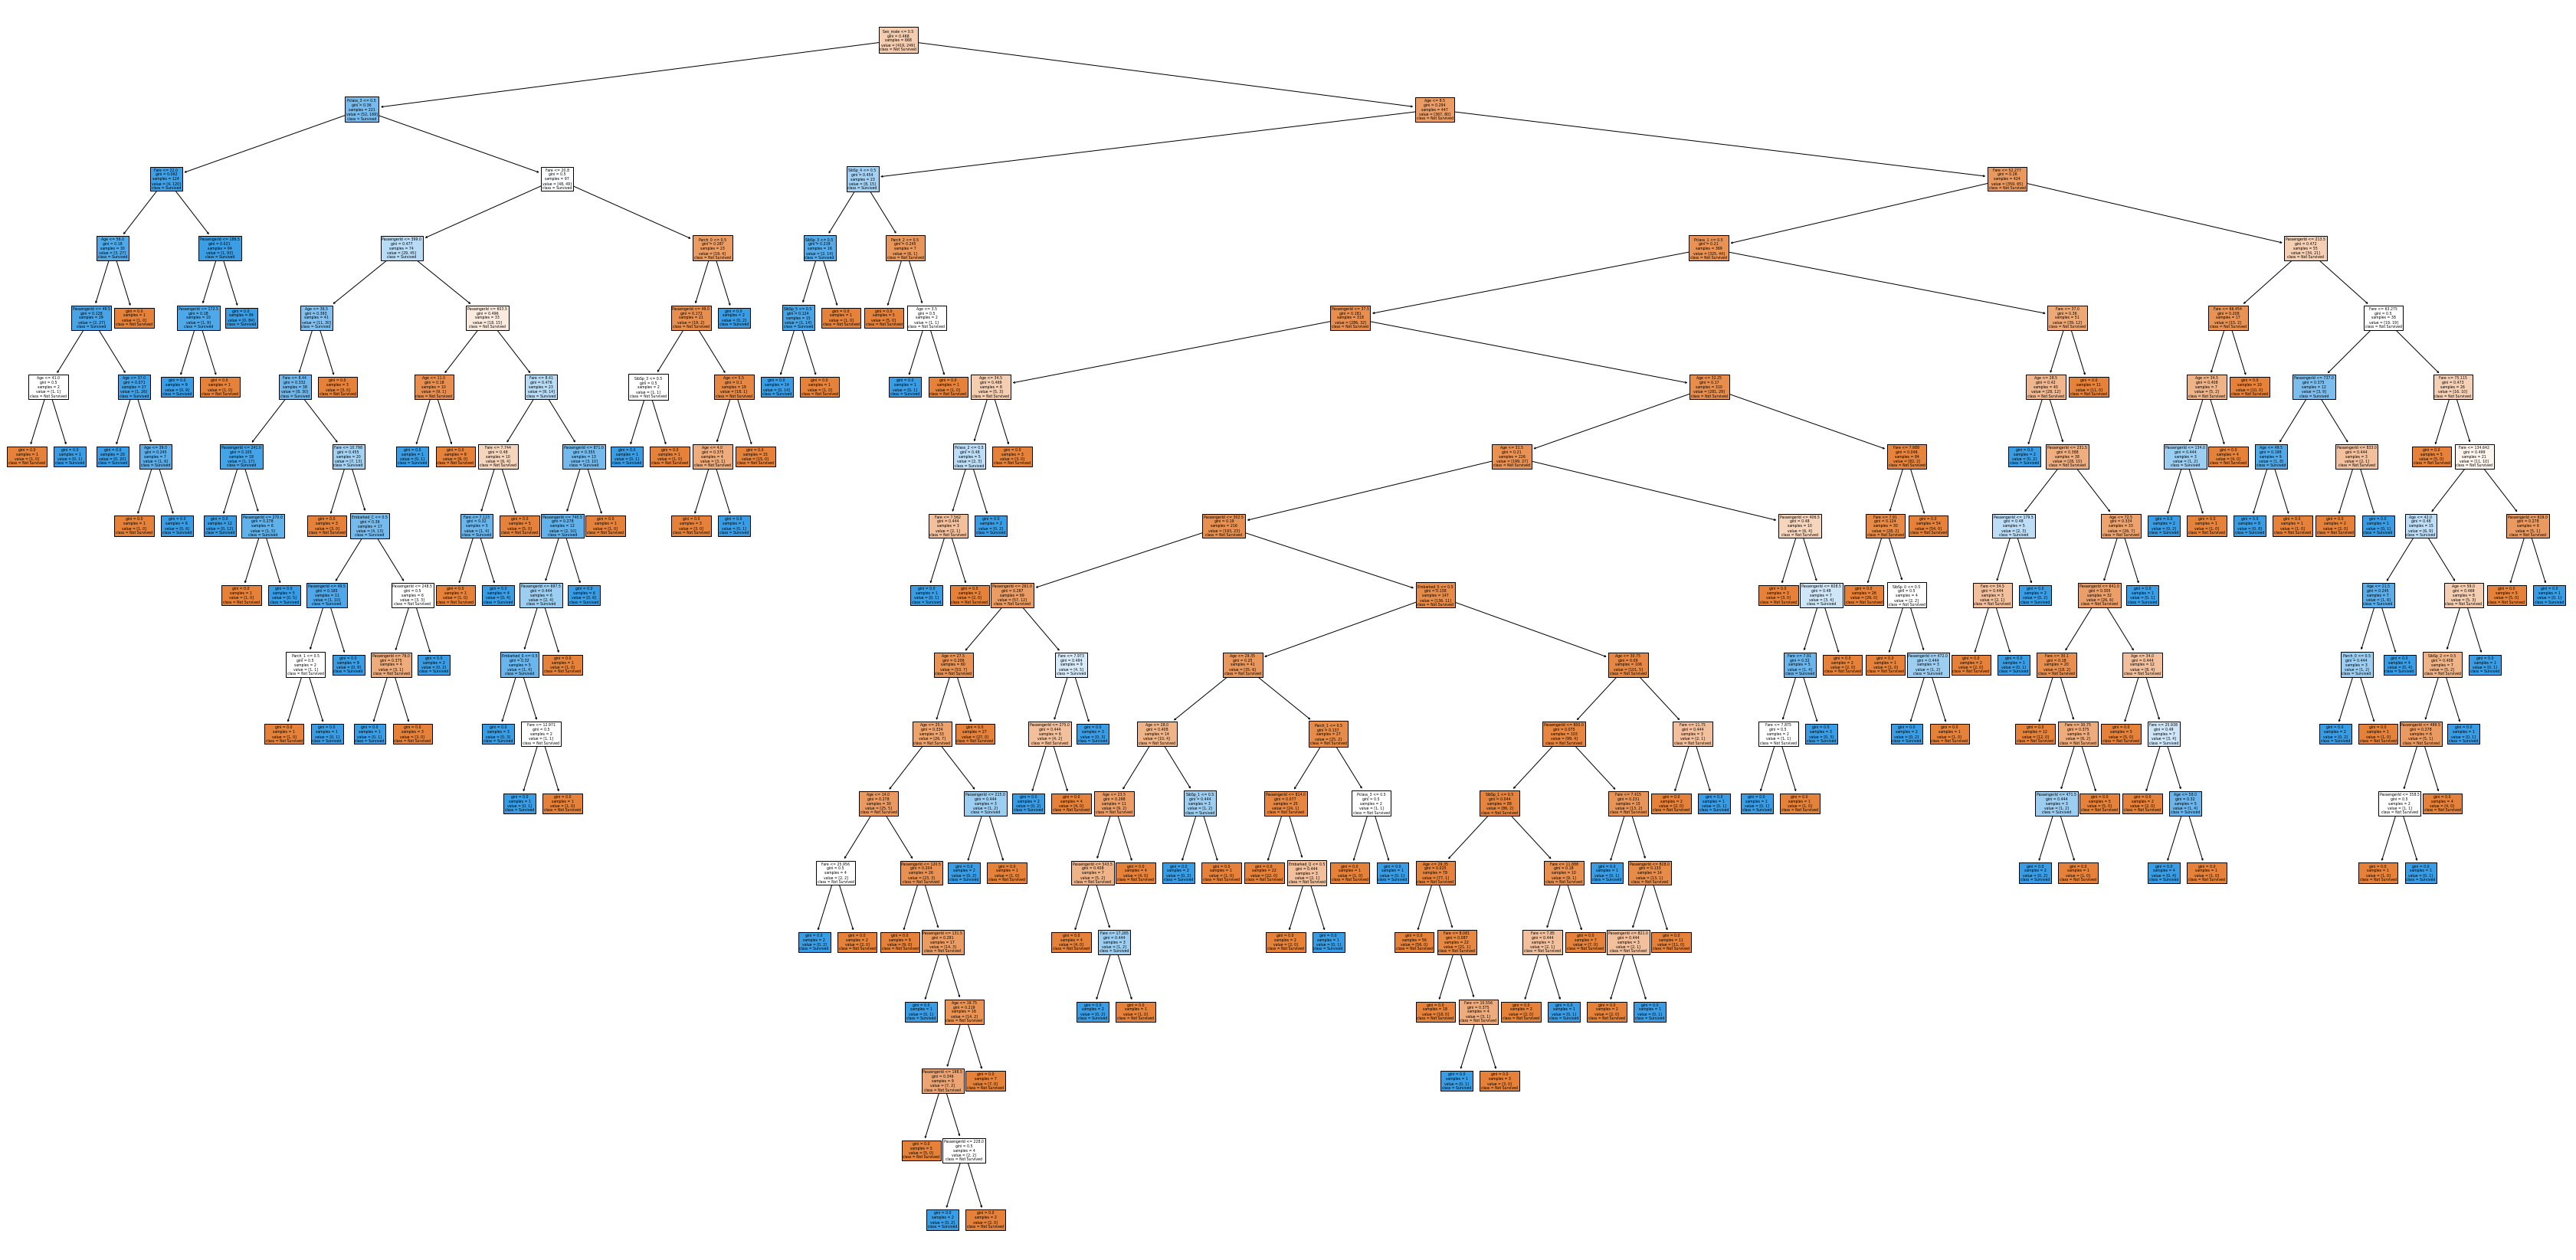

In [167]:
attribute_names=X.columns
label_names=np.array(["Not Survived", "Survived"])
fig = plt.figure(figsize=(60,30))
plot_tree(clf, 
                   feature_names =attribute_names,  
                   class_names=label_names,
                   filled=True)
plt.show()

In [168]:
y_predict=clf.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1], dtype=int64)